In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2 (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [5]:
X=df.drop('heart disease',axis=1)
y=df['heart disease']

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

### Train - Test split

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42 )

In [9]:
X_train.shape,X_test.shape

((189, 4), (81, 4))

### Building the Decision tree

using all the parameters except the depth

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [14]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [15]:
#dot_data = StringIO()

#export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               #feature_names=X.columns,
               #class_names=['No Disease','Disease'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

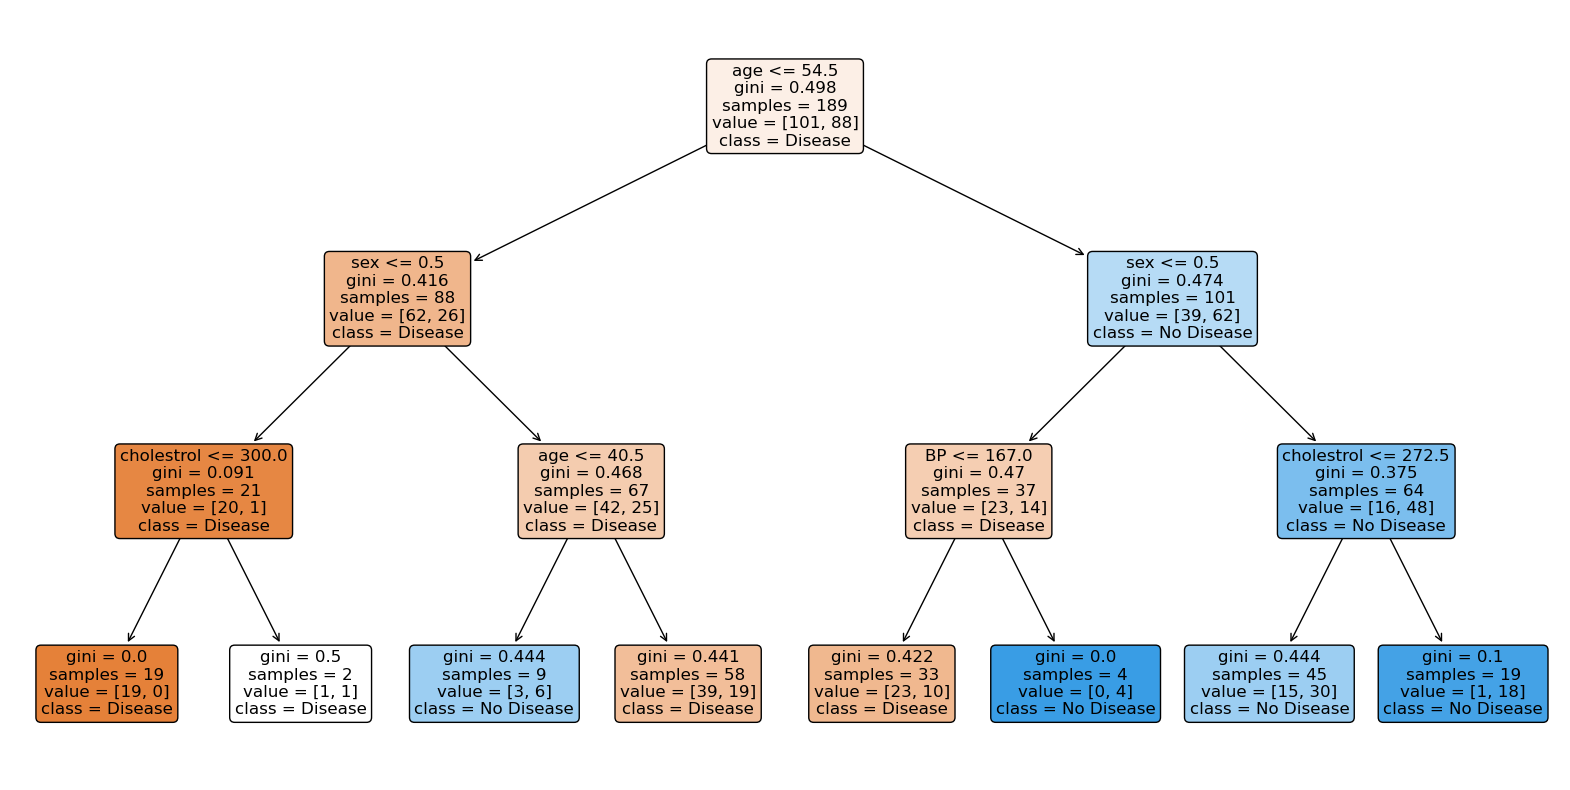

In [16]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, 
               filled=True, rounded=True, 
               feature_names = X_train.columns,
               class_names = ['Disease','No Disease'],
               fontsize=12)
plt.show()

### Evaluating the model performance on the test set


In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

0.7407407407407407
[[82 19]
 [30 58]]


In [20]:
print('Test set performance')
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


### Create the help function to evaluate the DT

In [21]:
def get_dt_graph(dt_classifier):
    plt.figure(figsize=(20,10))
    tree.plot_tree(dt_classifier, 
               filled=True, rounded=True, 
               feature_names = X_train.columns,
               class_names = ['Disease','No Disease'],
               fontsize=12)
    plt.show()
    
    return tree

In [22]:
def evaluate_model(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    
    print('Train set performance')
    print(accuracy_score(y_train,y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print('-'*50)
    print('Test set performance')
    print(accuracy_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))

In [23]:
evaluate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


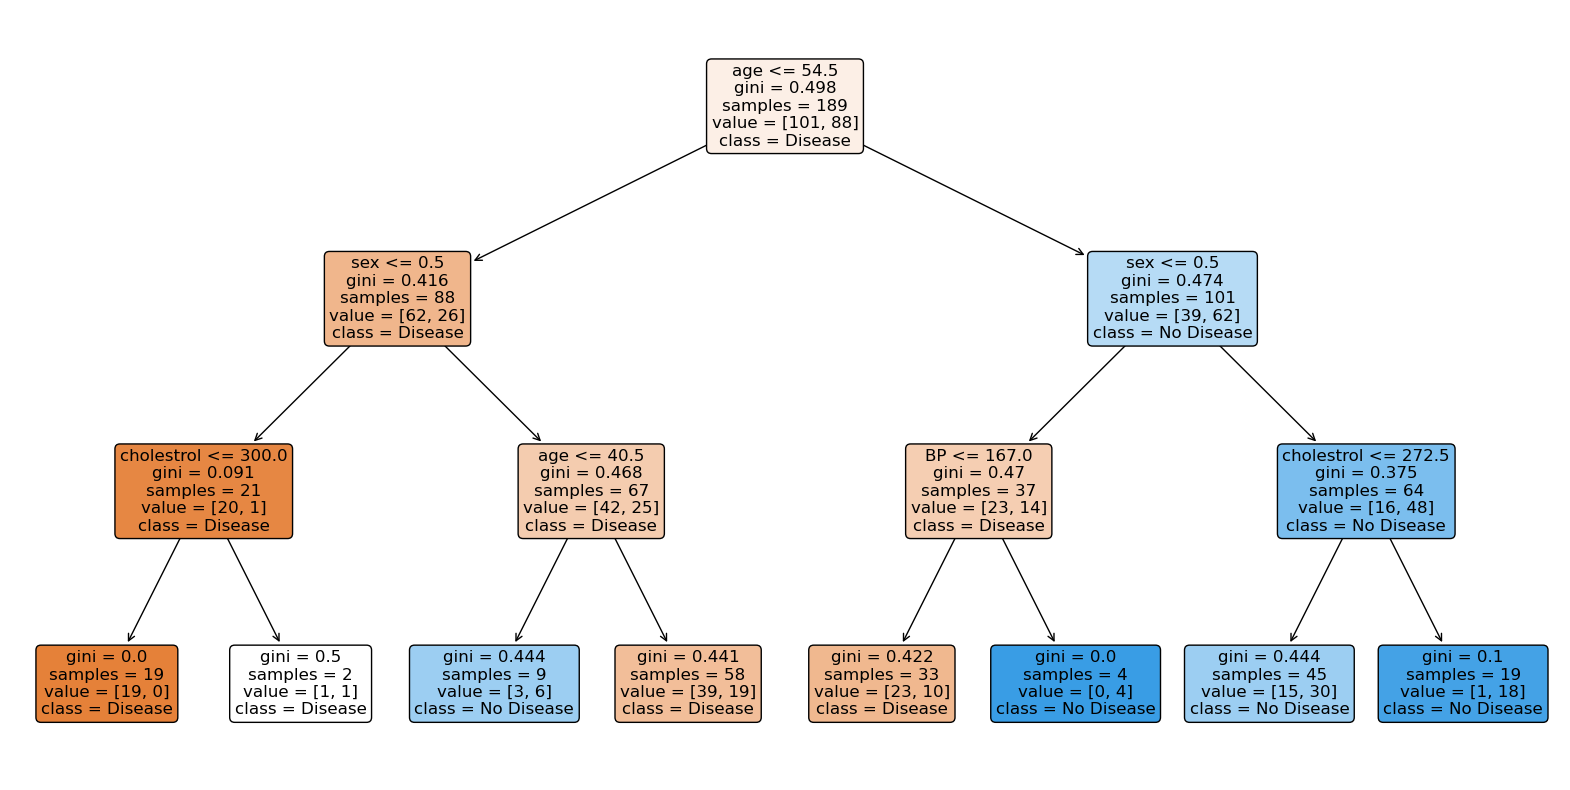

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [24]:
get_dt_graph(dt)

### Decision tree without any hyperparameter setting

In [25]:
dt_default=DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

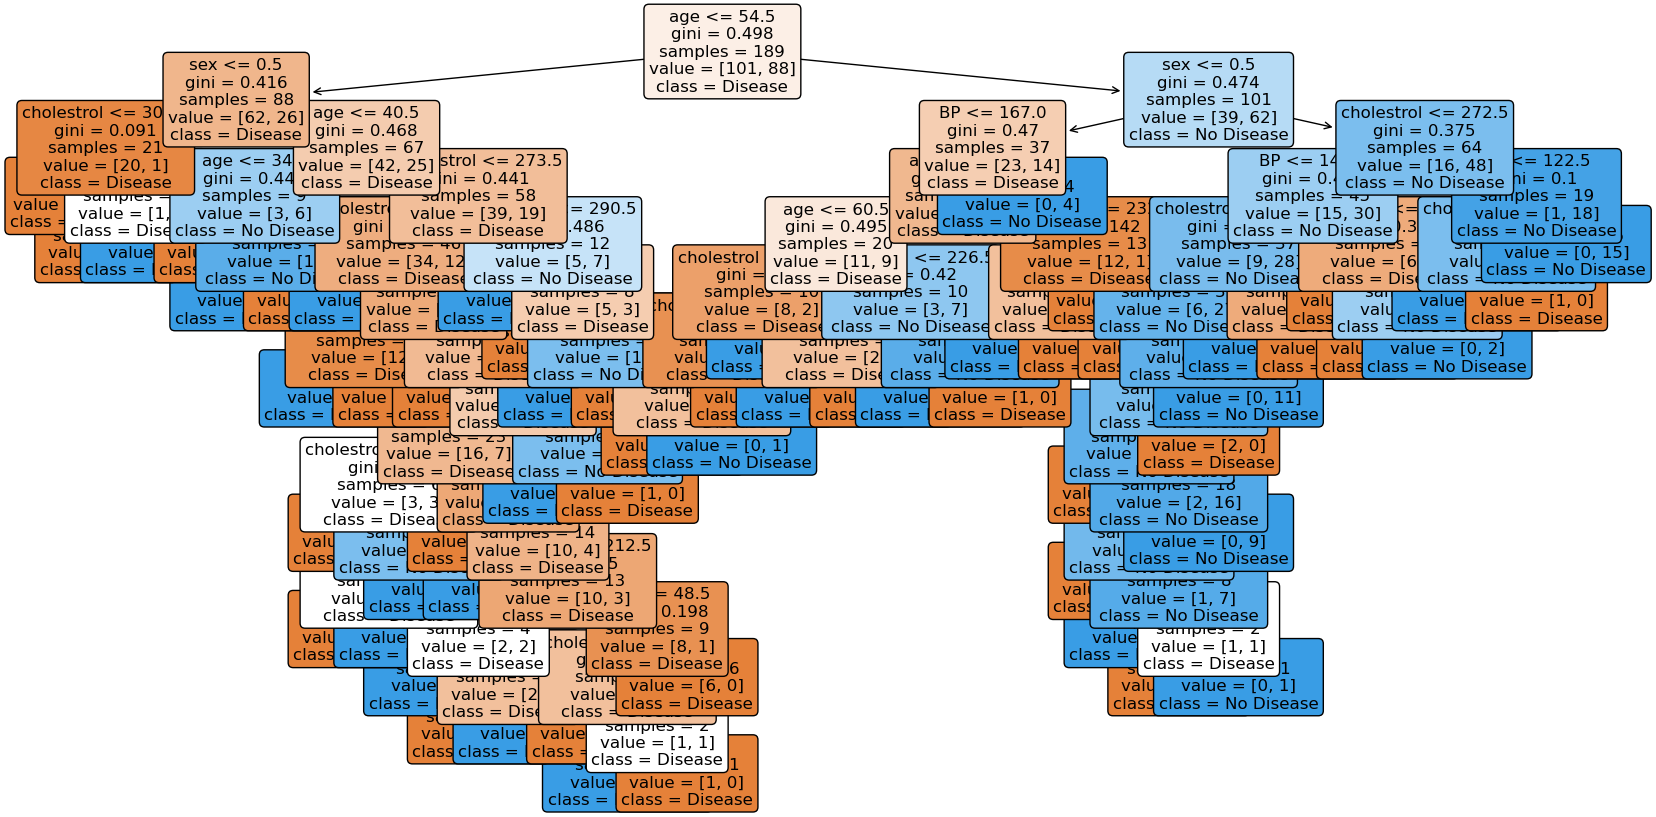

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [26]:
get_dt_graph(dt_default)

In [27]:
evaluate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance
0.6296296296296297
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [28]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

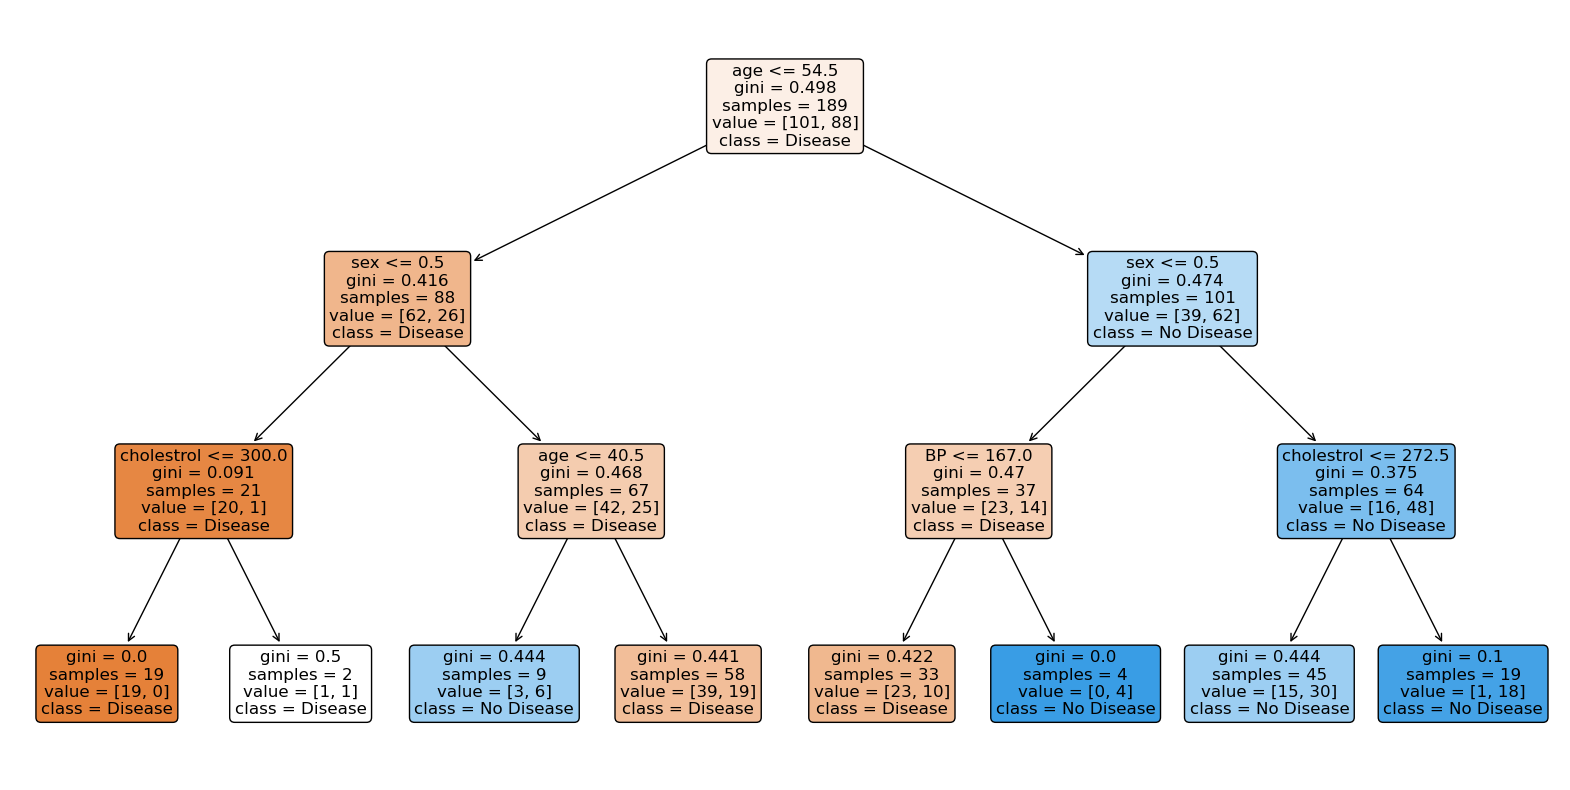

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [29]:
get_dt_graph(dt_depth)

In [30]:
evaluate_model(dt_depth)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


### specifying the minimum number of samples in split

In [31]:
dt_min_samples_split=DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_samples_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

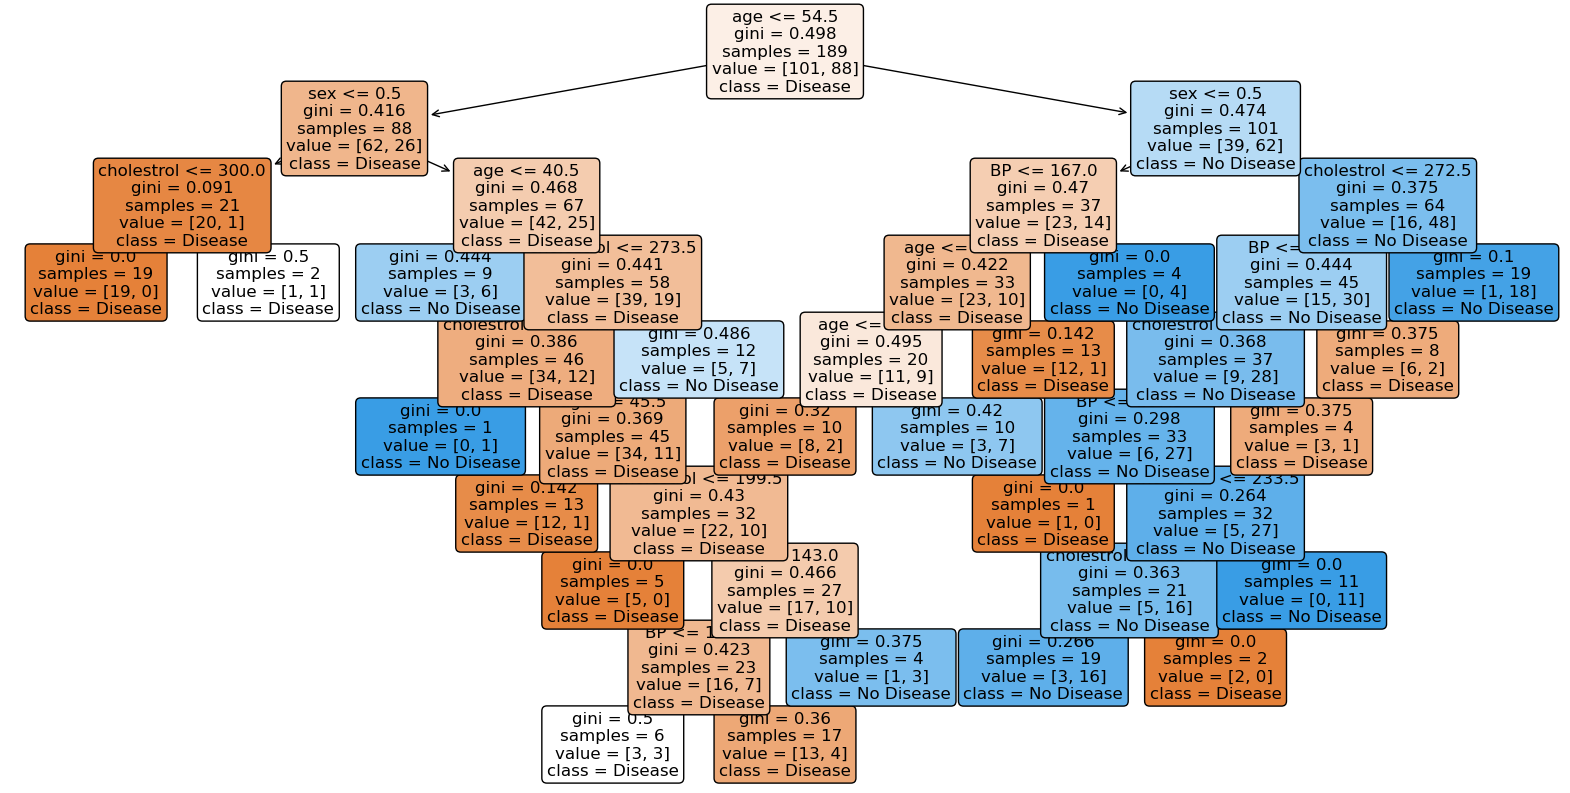

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


In [32]:
get_dt_graph(dt_min_samples_split)
evaluate_model(dt_min_samples_split)

### specifying the minimum number of samples in leaf node

In [33]:
dt_min_leaf=DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

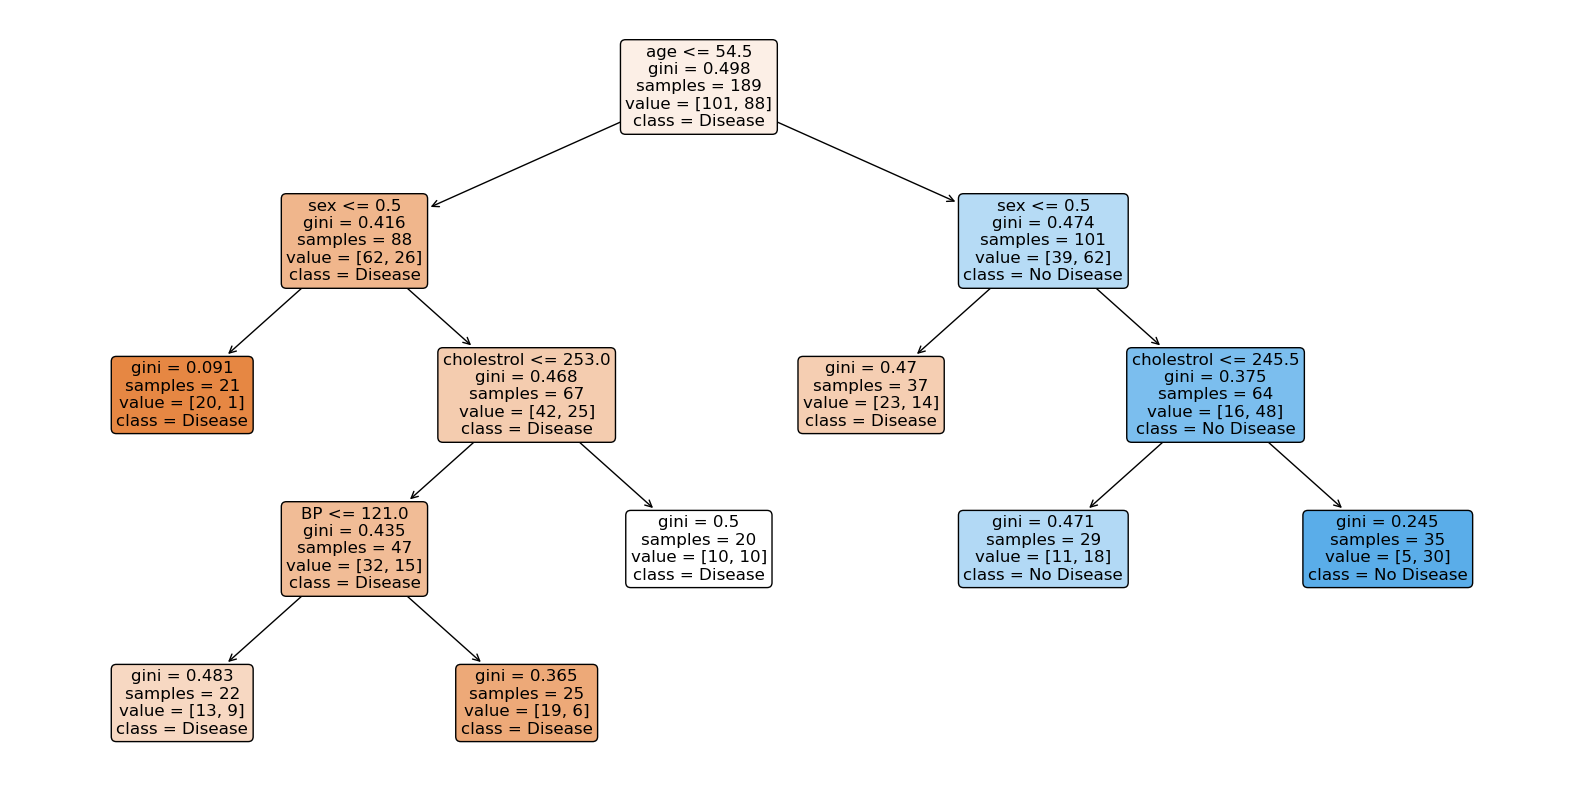

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [34]:
get_dt_graph(dt_min_leaf)
evaluate_model(dt_min_leaf)

### using the entropy instead of gini

In [35]:
dt_min_leaf_entropy=DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion='entropy')
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

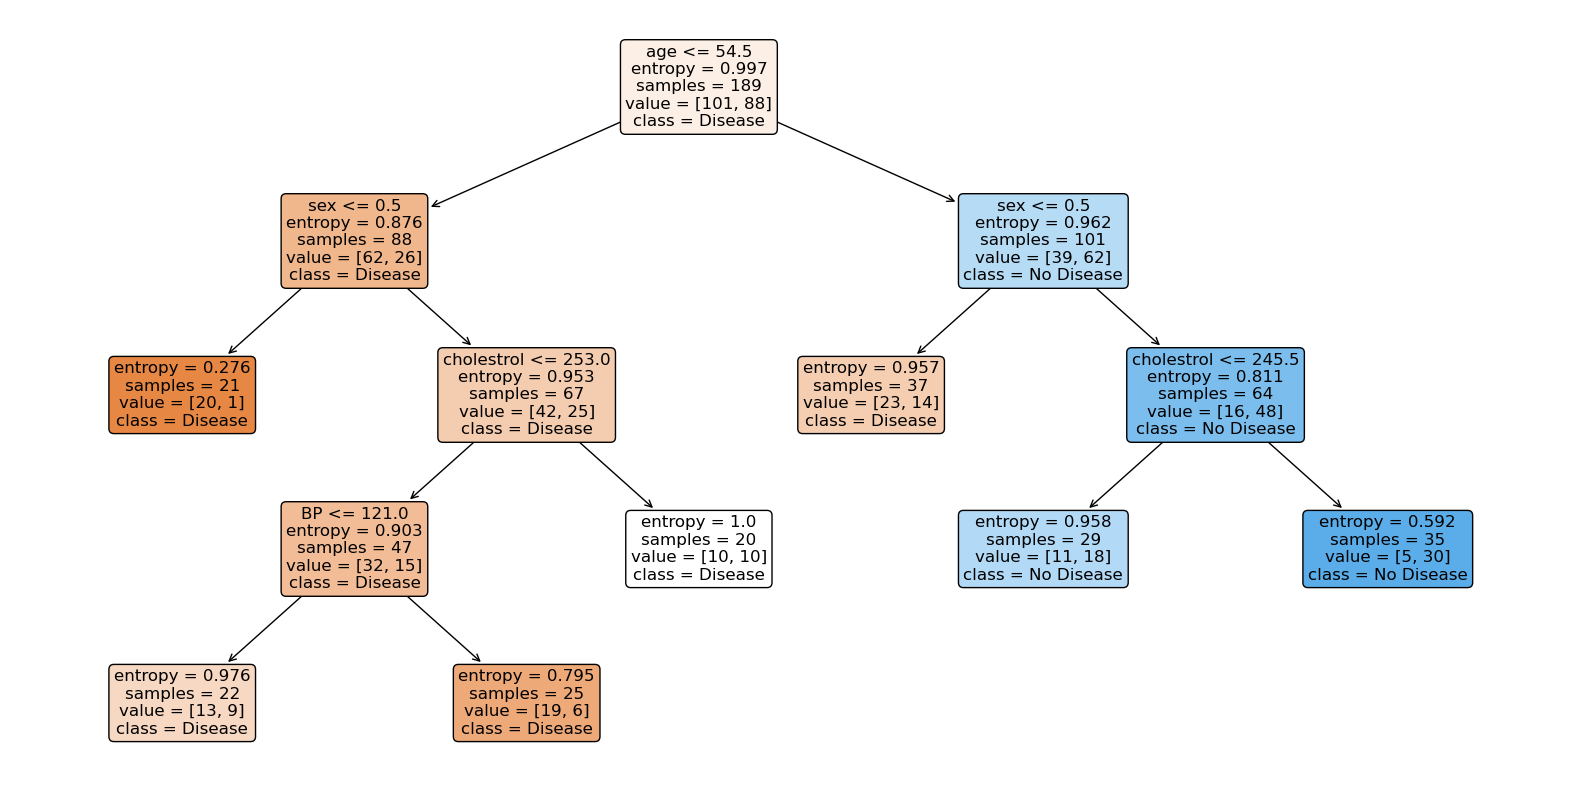

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [36]:
get_dt_graph(dt_min_leaf_entropy)
evaluate_model(dt_min_leaf_entropy)

### Hyper-parameter tuning using gridsearchCV

In [37]:
dt=DecisionTreeClassifier(random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {
         'max_depth':[2,3,5,10,20],
         'min_samples_leaf':[5,10,20,50,100],
         'criterion':['gini','entropy']
}

In [49]:
grid_search=GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4, n_jobs=-1,
            verbose=1, scoring='accuracy')

In [50]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 203 ms
Wall time: 474 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [51]:
cv_dt=pd.DataFrame(grid_search.cv_results_)
cv_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005736,0.002481,0.002992,0.000704,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.006481,0.004913,0.002247,0.000436,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.003989,0.000704,0.002743,0.000828,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.004987,0.000705,0.012716,0.016303,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.011222,0.005189,0.009718,0.010521,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [52]:
cv_dt.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.003990,9.884312e-07,0.002496,0.000502,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.005486,1.496196e-03,0.011718,0.013388,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.004987,7.050326e-04,0.012716,0.016303,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.003241,4.322264e-04,0.003241,0.001087,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.007231,5.743900e-03,0.002493,0.000498,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [53]:
grid_search.best_score_

0.6669991134751774

In [54]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [55]:
dt_best=grid_search.best_estimator_

In [56]:
evaluate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance
0.6172839506172839
[[36 13]
 [18 14]]


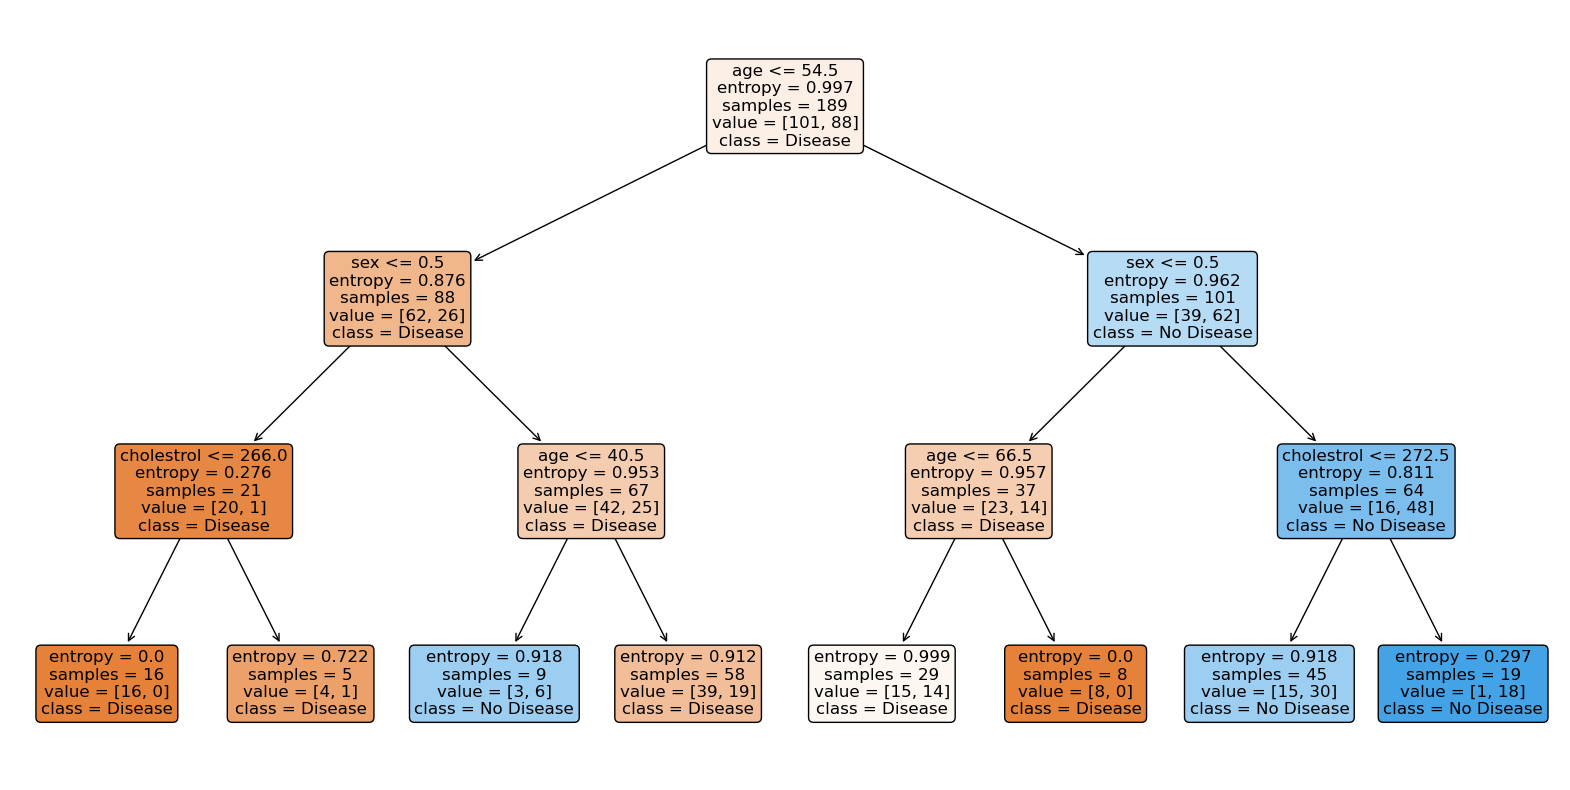

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [57]:
get_dt_graph(dt_best)

### Using Random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [60]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [61]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [63]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

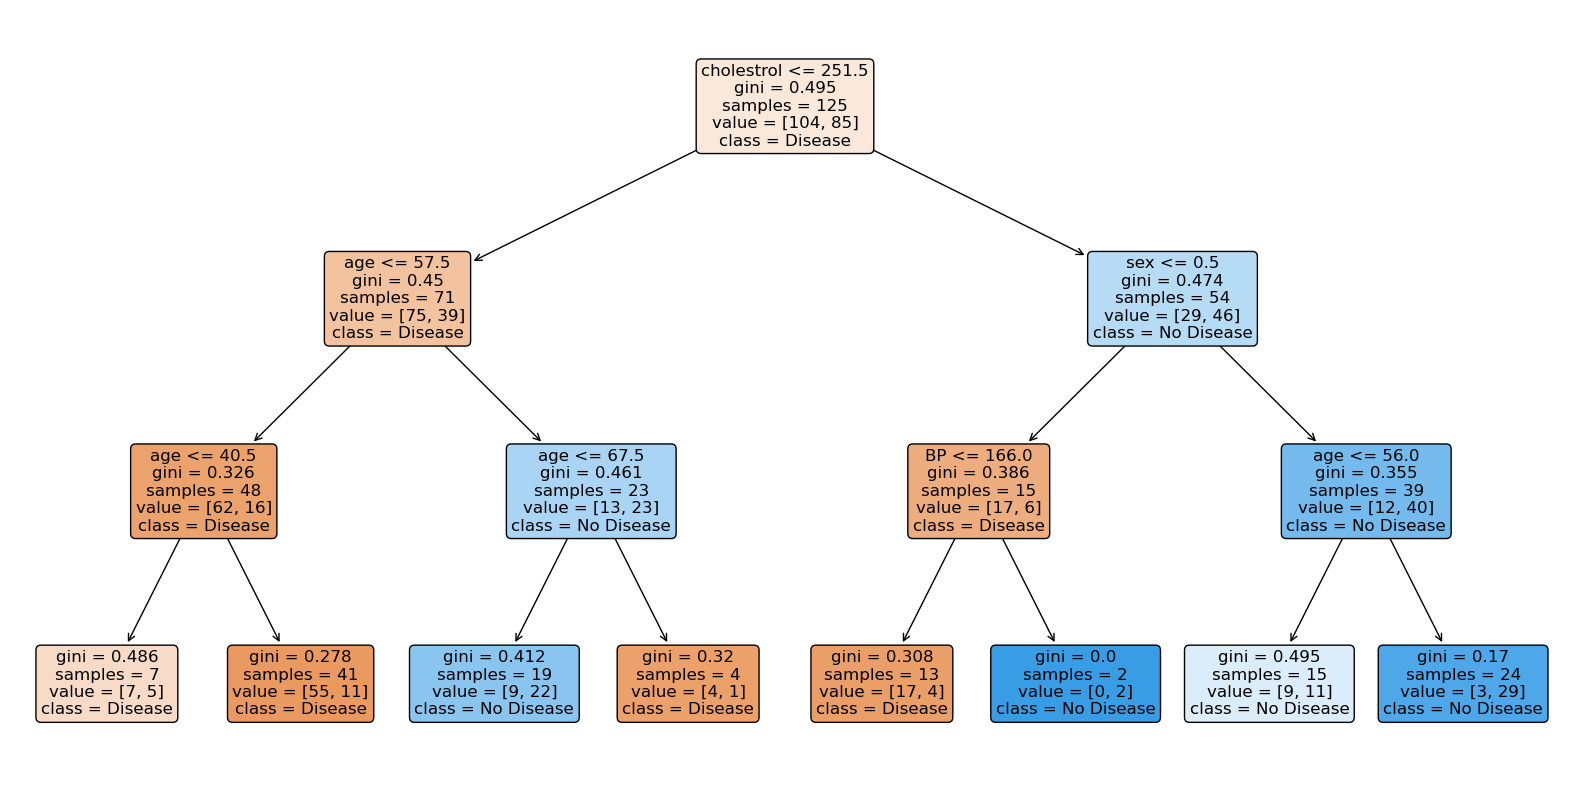

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [65]:
get_dt_graph(rf.estimators_[0])

In [66]:
sample_tree = rf.estimators_[4]

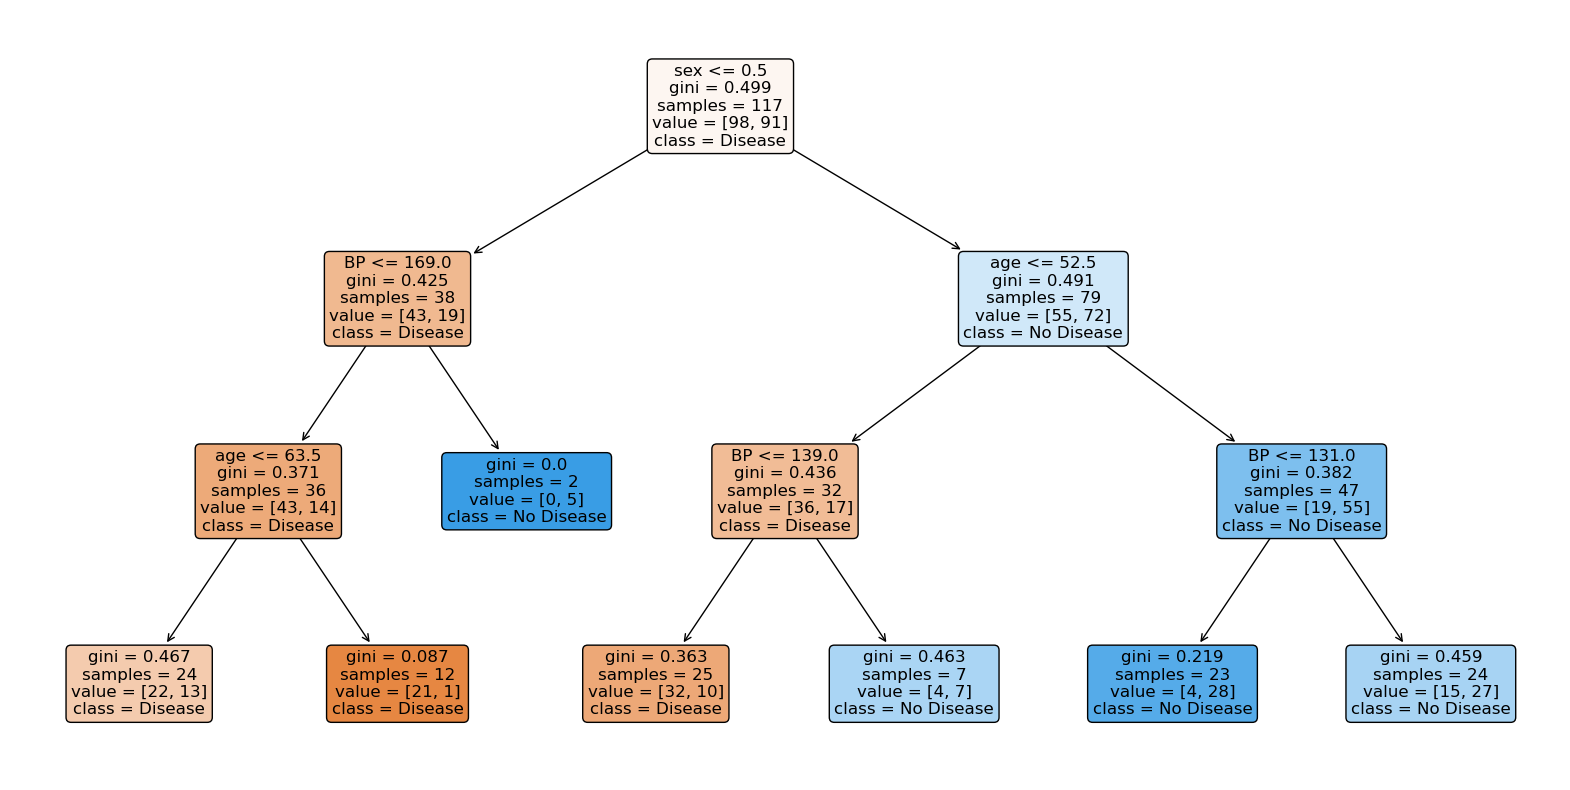

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [67]:
get_dt_graph(sample_tree)

### OOB score

In [68]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [69]:
rf.fit(X_train,y_train) 

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [70]:
rf.oob_score_

0.6349206349206349

### Grid-search for hyper parameter tuning

In [71]:
classifier_rf=RandomForestClassifier(random_state=42, n_jobs=-1)

In [72]:
# create the parameter grid based on the results of random search

params = {
          'max_depth':[1,2,5,10,20],
          'min_samples_leaf':[5,10,20,50,100],
          'max_features':[2,3,4],
          'n_estimators':[10,30,50,100,200]
}

In [73]:
#instantiate the grind search
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params,
                          cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [83]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 4 s
Wall time: 2min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [84]:
rf_best=grid_search.best_estimator_

In [85]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [86]:
evaluate_model(rf_best)

Train set performance
0.8042328042328042
[[87 14]
 [23 65]]
--------------------------------------------------
Test set performance
0.8024691358024691
[[42  7]
 [ 9 23]]


In [90]:
rf_best.estimators_

[DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=415968276),
 DecisionTreeClassif

In [88]:
sample_tree=rf_best.estimators_[1]

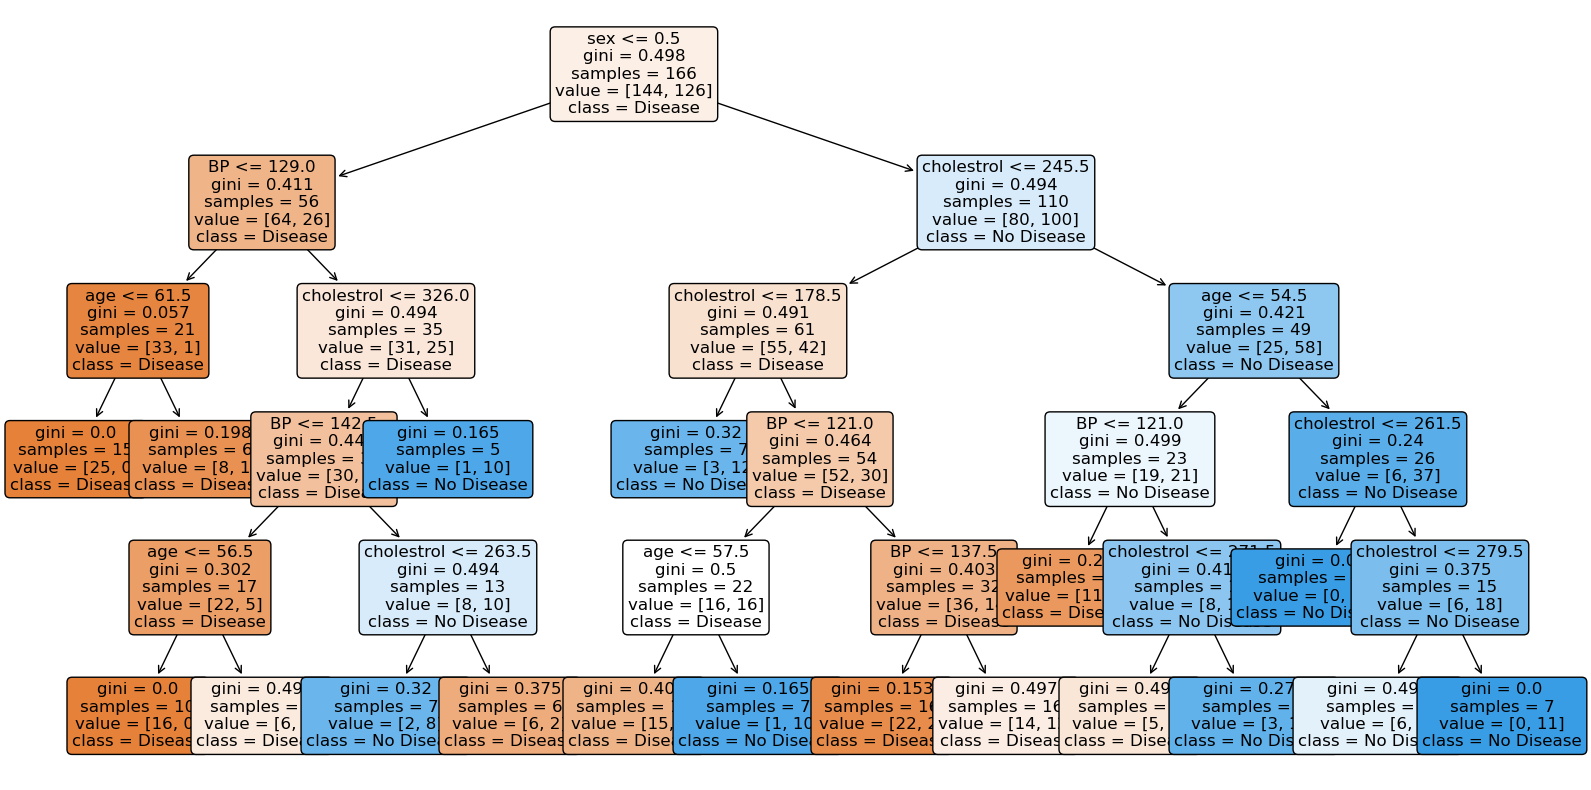

<module 'sklearn.tree' from 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [89]:
get_dt_graph(sample_tree)

### Variable importance in Random forest and Decision tree

In [91]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [92]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [93]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [94]:
imp_df=pd.DataFrame({
    'Varname':X_train.columns,
    'Imp':classifier_rf.feature_importances_
})

In [96]:
imp_df.sort_values(by='Imp',ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
